# Uber Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import statistics as stat

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.sample(20)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
57774,54430597,2010-03-30 12:17:00.000000211,10.9,2010-03-30 12:17:00 UTC,-73.969548,40.761247,-74.001365,40.756855,1
131854,41149949,2011-04-13 19:26:07.0000001,6.9,2011-04-13 19:26:07 UTC,-73.997667,40.742347,-73.993391,40.724310,1
73491,12280307,2009-05-09 09:30:00.00000021,5.7,2009-05-09 09:30:00 UTC,-73.990457,40.730197,-73.989067,40.721205,2
90381,22324670,2009-04-22 23:36:00.000000129,4.9,2009-04-22 23:36:00 UTC,-73.993738,40.735742,-74.001468,40.726352,1
142510,26558510,2011-04-16 12:35:00.00000074,6.9,2011-04-16 12:35:00 UTC,-73.998678,40.727987,-74.007502,40.740957,2
75686,36338720,2012-05-07 20:10:00.000000108,14.5,2012-05-07 20:10:00 UTC,-73.968412,40.754982,-73.952315,40.811090,1
105666,30294987,2011-04-17 15:45:00.000000150,6.9,2011-04-17 15:45:00 UTC,-73.981050,40.764107,-73.990810,40.750655,2
27801,4780481,2011-04-12 01:06:00.00000012,6.9,2011-04-12 01:06:00 UTC,-73.976030,40.755183,-73.998102,40.756898,5
180854,29151837,2015-03-15 13:54:07.0000009,13.0,2015-03-15 13:54:07 UTC,-73.984032,40.755363,-73.949379,40.784065,1
106637,32119131,2014-04-29 19:54:00.00000090,6.5,2014-04-29 19:54:00 UTC,-73.961430,40.764615,-73.950715,40.771000,4


In [5]:
df.shape

(200000, 9)

In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<AxesSubplot:>

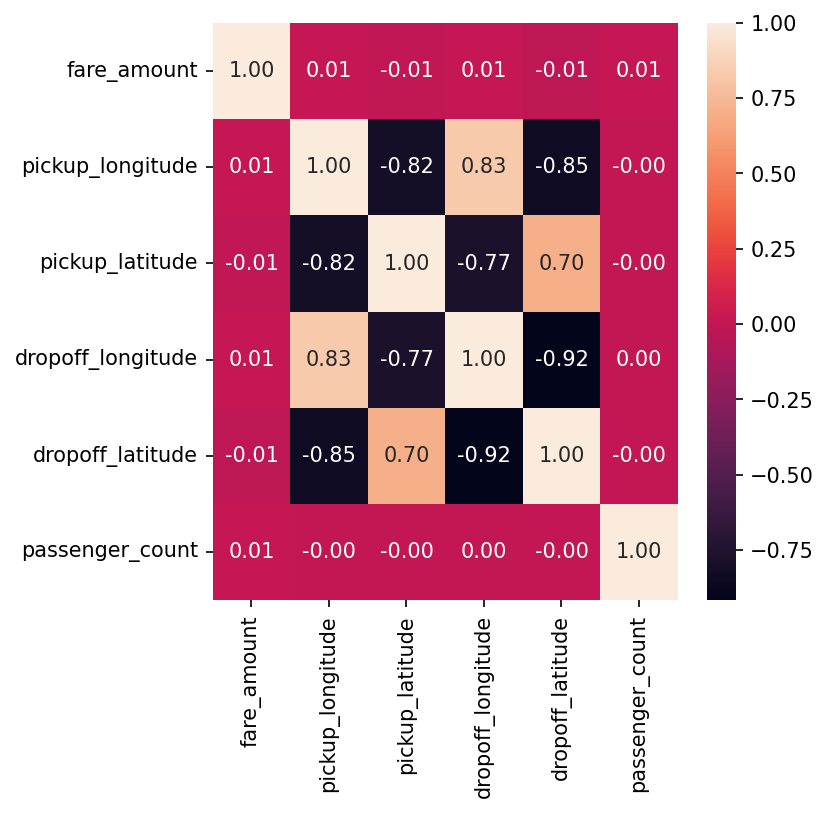

In [10]:
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(df.corr(),annot=True,fmt='.2f')

**Finding Distance between Pickup & Destination place**

In [11]:
from math import radians,asin

In [12]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
        c = 2 * asin(np.sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [13]:
# Calculate Haversine distance for each row and add distance in km as a new column
df['distance_travelled(in KM)'] = distance(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy())

In [14]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled(in KM)
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fare_amount                200000 non-null  float64
 1   pickup_longitude           200000 non-null  float64
 2   pickup_latitude            200000 non-null  float64
 3   dropoff_longitude          199999 non-null  float64
 4   dropoff_latitude           199999 non-null  float64
 5   passenger_count            200000 non-null  int64  
 6   distance_travelled(in KM)  199999 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 10.7 MB


In [16]:
df['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: passenger_count, dtype: int64

In [17]:
df[df['passenger_count']==208]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled(in KM)
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,0.009825


In [18]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled(in KM)
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [19]:
df['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: passenger_count, dtype: int64

In [20]:
df[df['passenger_count']==208]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled(in KM)
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,0.009825


In [21]:
df=df.drop(113038,axis=0)

In [22]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled(in KM)
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


### Outlier Treatment
The following treatment is being done to outliers:

* passanger_count should be less than 6
* rows with passanger_count = 0 should be dropped
* fare_amount should be kept to the minimum set by Uber, i.e., $2.5
* distance should be maximum 130 km
* distance travelled cannot be zero. Rows with distance = 0 must be dropped


In [23]:
df.drop(df[df['passenger_count'] > 6].index, axis=0, inplace = True)
df.drop(df[df['passenger_count'] == 0].index, axis=0, inplace = True)
df.drop(df[df['fare_amount'] < 2.5].index, axis=0, inplace = True)
df.drop(df[df['distance_travelled(in KM)'] > 130].index, axis=0, inplace = True)
df.drop(df[df['distance_travelled(in KM)'] == 0].index, axis=0, inplace = True)
df.dropna(axis=0,inplace=True)

In [24]:
df.shape

(193215, 7)

### Data Preparatrion:
#### Feature Scaling
Feature Scaling is required because of two reasons:

* The data points are far from each other. This means that in some columns, the distance between data points is a lot
* Some of the features have a unit while other features are unitless. Thereofre, it is important to make all features unitless

In [25]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [26]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric 


scaler = StandardScaler()

In [27]:
x = df.drop(['fare_amount'], axis = 1)
y = df['fare_amount']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
x_train.shape

(135250, 2)

In [30]:
x_train

,passenger_count,distance_travelled(in KM)
145128,1,1.452963
380,5,1.650255
15892,1,0.877667
108487,1,2.847205
128657,1,4.799374
...,...,...
124120,1,1.588850
107356,1,1.604617
136574,1,2.452762
152056,1,3.829111


In [31]:
y_train.shape

(135250,)

In [32]:
x_test.shape

(57965, 2)

In [33]:
y_test.shape

(57965,)

In [34]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

### Regression Models
##### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression 
# creating an instance of linear regression model
LR = LinearRegression()
#fitting the linear regression model with train data
LR.fit(scaled_x_train,y_train)

LinearRegression()

In [36]:
# Making predictions using X_test data 
LR_pred = LR.predict(scaled_x_test)

In [37]:
print("Training set score: {:.2f}".format(LR.score(scaled_x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(scaled_x_test, y_test)))

Training set score: 0.64
Test set score: 0.5947319


In [38]:
from sklearn import metrics
MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))

In [39]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)

Mean absolute error of linear regression 2.6361216130507494
Mean square  error of linear regression 40.5550348247498
root Mean square error of linear regression 6.368283506938883


### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
# creating an instance of Decision Tree Regressor
DT = DecisionTreeRegressor()
# Fitting the model with training data
DT.fit(scaled_x_train, y_train)

DecisionTreeRegressor()

In [41]:
# Making predictions using X_test data 
DTpreds = DT.predict(scaled_x_test)

In [42]:
print("Training set score: {:.2f}".format(DT.score(scaled_x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(scaled_x_test, y_test)))

Training set score: 1.00
Test set score: 0.5526966


In [43]:
# Getting the error metrics by comparing origanal Y_test and predictions of Desition Tree regression model 
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))

In [44]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)

Mean absolute error of decision tree 3.2772453779579633
Mean square  error of decision tree 44.76148889324976
root Mean square error of decision tree 6.690402745220183


### Random Forest regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
# Creating an instance of Random Forest regressor
RF = RandomForestRegressor()
# Fitting the model using train data
RF.fit(scaled_x_train, y_train)

RandomForestRegressor()

In [46]:
#Making predictions on X_test
RFpreds = RF.predict(scaled_x_test)

In [47]:
print("Training set score: {:.2f}".format(RF.score(scaled_x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(scaled_x_test, y_test)))

Training set score: 0.96
Test set score: 0.6810459


In [48]:
MAE_RF= metrics.mean_absolute_error(y_test, RFpreds)
MSE_RF= metrics.mean_squared_error(y_test, RFpreds)
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test, RFpreds))

In [49]:
print('Mean absolute error of random forest',MAE_RF)
print('Mean square  error of random forest',MSE_RF)
print('root Mean square error of random forest',RMSE_RF)

Mean absolute error of random forest 2.772955238363599
Mean square  error of random forest 31.91762525646749
root Mean square error of random forest 5.64956859029674


### Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Boosting

In [51]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(scaled_x_train, y_train)
predictions_gbr = gbr.predict(x_test)

In [52]:
print("Training set score: {:.2f}".format(gbr.score(scaled_x_train, y_train)))
print("Test set score: {:.7f}".format(gbr.score(scaled_x_test, y_test)))

Training set score: 0.79
Test set score: 0.7579801


In [53]:
MAE_GBR= metrics.mean_absolute_error(y_test, predictions_gbr)
MSE_GBR= metrics.mean_squared_error(y_test, predictions_gbr)
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr))

In [54]:
print('Mean absolute error of gradient boosting regressor',MAE_GBR)
print('Mean square  error of gradient boosting regressor',MSE_GBR)
print('root Mean square error of gradient boosting regressor',RMSE_GBR)

Mean absolute error of gradient boosting regressor 30.182286993712275
Mean square  error of gradient boosting regressor 1446.7358885277033
root Mean square error of gradient boosting regressor 38.03598149815124


### Choosing the best models

In [55]:
cols = ['Model','MAE','MSE', 'RMSE',]

# create a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [56]:
full_metrics = pd.Series({'Model': "Linear Regression", 'MAE':MAE_LR,'MSE': MSE_LR, 'RMSE' : RMSE_LR})

In [57]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [58]:
full_metrics = pd.Series({'Model': "Decision Tree", 'MAE':MAE_DT,
                          'MSE': MSE_DT,
                          'RMSE' : RMSE_DT})

In [59]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [60]:
full_metrics = pd.Series({'Model': "Random Forest", 'MAE':MAE_RF,'MSE': MSE_RF, 'RMSE' : RMSE_RF})

In [61]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [62]:
full_metrics = pd.Series({'Model': "Gardient Boosting",'MAE':MAE_GBR,
                          'MSE': MSE_GBR, 'RMSE' : RMSE_GBR})


In [63]:
result_table = result_table.append(full_metrics, ignore_index = True)

In [64]:
result_table


,Model,MAE,MSE,RMSE
0,Linear Regression,2.636122,40.555035,6.368284
1,Decision Tree,3.277245,44.761489,6.690403
2,Random Forest,2.772955,31.917625,5.649569
3,Gardient Boosting,30.182287,1446.735889,38.035981


In [65]:
df

,fare_amount,passenger_count,distance_travelled(in KM)
0,7.5,1,1.683323
1,7.7,1,2.457590
2,12.9,1,5.036377
3,5.3,3,1.661683
4,16.0,5,4.475450
...,...,...,...
199995,3.0,1,0.112210
199996,7.5,1,1.875050
199997,30.9,2,12.850319
199998,14.5,1,3.539715


### Saving Scaler and Model

In [66]:
import pickle

In [74]:
# Saving Scaler as pickle file
pickle.dump(scaler,open('uber_fare_scaler.sav','wb'))

In [73]:
# Saving ML Model as pickle file
pickle.dump(RF,open('uber_fare_RFprediction_model.sav','wb'))

### Loading the Scaler and Model

In [76]:
loaded_model = pickle.load(open('uber_fare_RFprediction_model.sav','rb'))
loaded_scaler = pickle.load(open('uber_fare_scaler.sav','rb'))

In [79]:
input_data = np.array([5,4.47])
scaled_input_data = loaded_scaler.transform(input_data.reshape(1,-1))

In [80]:
loaded_model.predict(scaled_input_data)

array([15.984])

In [70]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
        c = 2 * asin(np.sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [71]:
def dist(longitude1, latitude1, longitude2, latitude2):
        long1,lati1,long2,lati2 = map(radians,[longitude1,latitude1,longitude2,latitude2])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
        c = 2 * asin(np.sqrt(a))*6371
        return c

In [72]:
dist(-73.987042,40.739367,-73.986525,40.740297)

0.11221024486769245